<center><h2>Chicago_Crimes_Data </h2>
   <h3> Data Analysis and Predictive Modeling <h3></center>

<font size = 4>__Importing required libraries__  </font>

In [1]:

import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# ML Libraries
from sklearn.metrics import *  #precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier


# Evaluation Metrics
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('chicago_crimes_data_2010_2017.csv')
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Year
0,1027327,8899599,HV573490,11/22/12 11:00,023XX N NORDICA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,2512,25.0,36.0,18.0,14,41.923153,-87.802559,2012
1,720647,8417624,HT650924,12/28/11 21:17,002XX W 118TH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,True,False,522,5.0,34.0,53.0,15,41.679787,-87.627957,2011
2,32037,7348669,HS150223,02/03/2010 21:40,026XX W 24TH ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,1034,10.0,28.0,30.0,08B,41.848314,-87.691627,2010
3,532182,8124889,HT358665,6/21/11 13:10,017XX W PRYOR AVE,320,ROBBERY,STRONGARM - NO WEAPON,CTA BUS,False,False,2212,22.0,19.0,75.0,3,41.692042,-87.665924,2011
4,2420587,11164022,JA530938,11/30/17 11:45,031XX W DIVERSEY AVE,325,ROBBERY,VEHICULAR HIJACKING,STREET,False,False,1411,14.0,35.0,21.0,3,41.932040,-87.705287,2017


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488270 entries, 0 to 488269
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            488270 non-null  int64  
 1   ID                    488270 non-null  int64  
 2   Case Number           488269 non-null  object 
 3   Date                  488270 non-null  object 
 4   Block                 488270 non-null  object 
 5   IUCR                  488270 non-null  object 
 6   Primary Type          488270 non-null  object 
 7   Description           488270 non-null  object 
 8   Location Description  487680 non-null  object 
 9   Arrest                488270 non-null  bool   
 10  Domestic              488270 non-null  bool   
 11  Beat                  488270 non-null  int64  
 12  District              488269 non-null  float64
 13  Ward                  488261 non-null  float64
 14  Community Area        488183 non-null  float64
 15  

In [4]:
# Preprocessing
# Remove NaN Value (As Dataset is huge, the NaN row could be neglectable)  
df = df.dropna().reset_index()
df = df.drop(['index'], axis = 1)
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Year
0,1027327,8899599,HV573490,11/22/12 11:00,023XX N NORDICA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,2512,25.0,36.0,18.0,14,41.923153,-87.802559,2012
1,720647,8417624,HT650924,12/28/11 21:17,002XX W 118TH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,True,False,522,5.0,34.0,53.0,15,41.679787,-87.627957,2011
2,32037,7348669,HS150223,02/03/2010 21:40,026XX W 24TH ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,1034,10.0,28.0,30.0,08B,41.848314,-87.691627,2010
3,532182,8124889,HT358665,6/21/11 13:10,017XX W PRYOR AVE,320,ROBBERY,STRONGARM - NO WEAPON,CTA BUS,False,False,2212,22.0,19.0,75.0,3,41.692042,-87.665924,2011
4,2420587,11164022,JA530938,11/30/17 11:45,031XX W DIVERSEY AVE,325,ROBBERY,VEHICULAR HIJACKING,STREET,False,False,1411,14.0,35.0,21.0,3,41.932040,-87.705287,2017


In [5]:
# As the dataset is too huge is size, we would just subsampled a dataset for modelling as proof of concept
df = df.sample(n=200000)

In [6]:
# Remove irrelevant/not meaningfull attributes
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['ID'], axis=1)
df = df.drop(['Case Number'], axis=1) 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 369215 to 217282
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  200000 non-null  object 
 1   Block                 200000 non-null  object 
 2   IUCR                  200000 non-null  object 
 3   Primary Type          200000 non-null  object 
 4   Description           200000 non-null  object 
 5   Location Description  200000 non-null  object 
 6   Arrest                200000 non-null  bool   
 7   Domestic              200000 non-null  bool   
 8   Beat                  200000 non-null  int64  
 9   District              200000 non-null  float64
 10  Ward                  200000 non-null  float64
 11  Community Area        200000 non-null  float64
 12  FBI Code              200000 non-null  object 
 13  Latitude              200000 non-null  float64
 14  Longitude             200000 non-null  float64


#### Extracting Date

In [7]:
# Splitting the Date to Day, Month, Year, Hour, Minute, Second
df['date2'] = pd.to_datetime(df['Date'])
df['Year'] = df['date2'].dt.year
df['Month'] = df['date2'].dt.month
df['Day'] = df['date2'].dt.day

df = df.drop(['Date'], axis=1) 
df = df.drop(['date2'], axis=1) 
df.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Year,Month,Day
369215,028XX W 31ST ST,810,THEFT,OVER $500,STREET,False,False,1033,10.0,12.0,30.0,6,41.837406,-87.695670,2013,10,8
205336,082XX S EXCHANGE AVE,496,BATTERY,AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST,APARTMENT,False,False,424,4.0,7.0,46.0,04B,41.745870,-87.552784,2015,12,8
420321,015XX N LOREL AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,RESIDENTIAL YARD (FRONT/BACK),True,False,2532,25.0,37.0,25.0,18,41.908463,-87.759654,2014,8,15
164190,006XX N SPAULDING AVE,560,ASSAULT,SIMPLE,STREET,False,False,1121,11.0,27.0,23.0,08A,41.892627,-87.708909,2013,8,15
122013,041XX N WOLCOTT AVE,820,THEFT,$500 AND UNDER,STREET,False,False,1912,19.0,47.0,5.0,6,41.956277,-87.676391,2016,2,12


In [8]:
# Convert Categorical Attributes to Numerical
df1 = df.copy()

df['Block']= pd.factorize(df["Block"])[0]
df['IUCR'] = pd.factorize(df["IUCR"])[0]
df['Description'] = pd.factorize(df["Description"])[0]
df['Location Description'] = pd.factorize(df["Location Description"])[0]
df['FBI Code'] = pd.factorize(df["FBI Code"])[0]
df['Domestic'] = pd.factorize(df["Domestic"])[0]



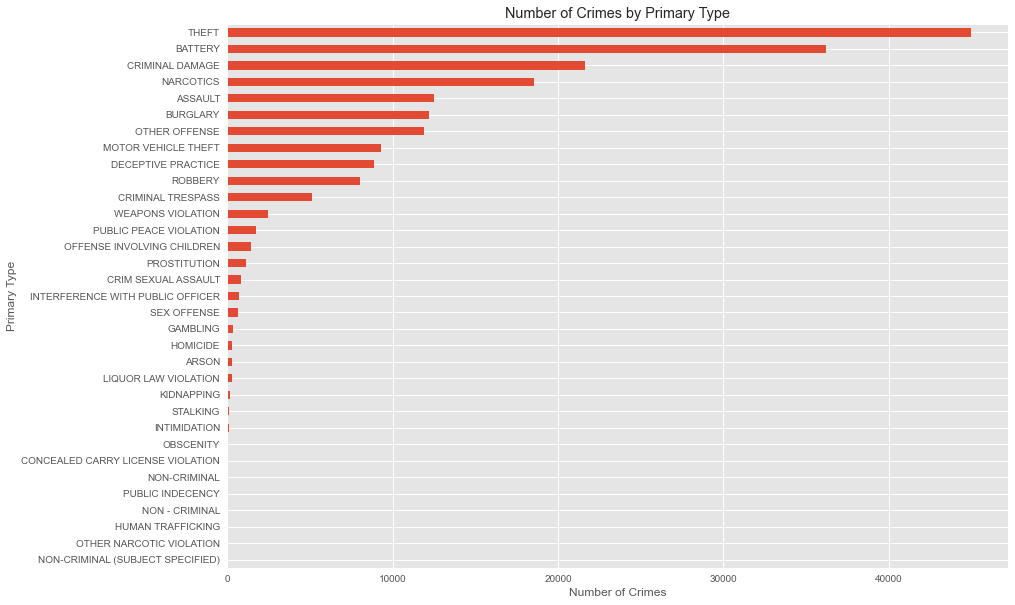

In [9]:
# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.style.use('ggplot')

plt.title('Number of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Number of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [10]:
# Therefore, we are going to group several less occured Crime Type into 'Others' to reduce the Target Class amount

# First, we sum up the amount of Crime Type happened and select the last 13 classes
all_classes = df.groupby(['Primary Type'])['Block'].size().reset_index()
all_classes['Amt'] = all_classes['Block']
all_classes = all_classes.drop(['Block'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=[False])

unwanted_classes = all_classes.tail(13)
unwanted_classes

,Primary Type,Amt
0,ARSON,297
15,LIQUOR LAW VIOLATION,285
14,KIDNAPPING,155
30,STALKING,124
13,INTIMIDATION,93
21,OBSCENITY,26
4,CONCEALED CARRY LICENSE VIOLATION,14
19,NON-CRIMINAL,11
26,PUBLIC INDECENCY,9
18,NON - CRIMINAL,6


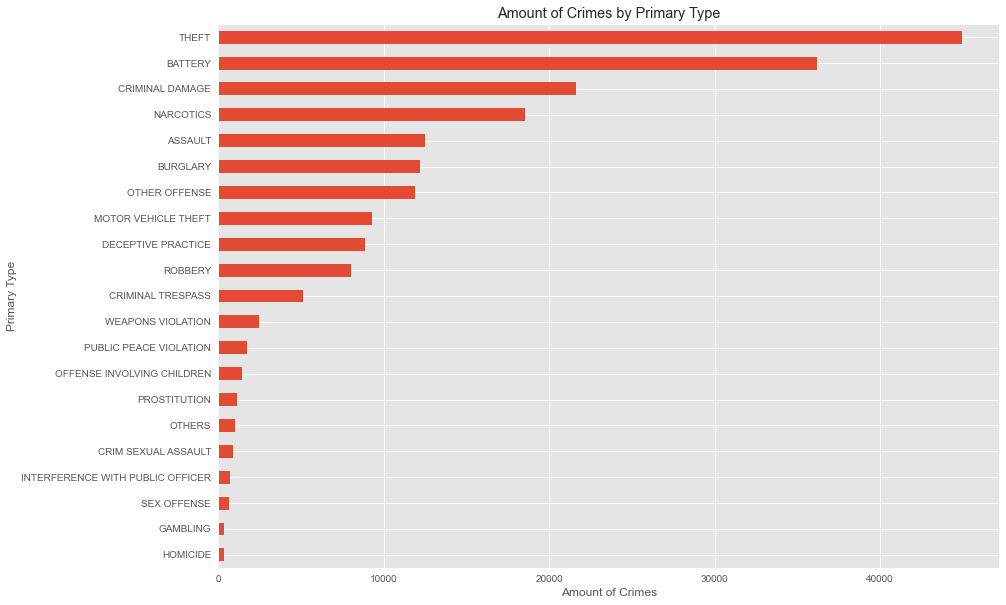

In [11]:
#After that, we replaced it with label 'OTHERS'
df.loc[df['Primary Type'].isin(unwanted_classes['Primary Type']), 'Primary Type'] = 'OTHERS'

# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [12]:
# Now we are left with 14 Class as our predictive class
Classes = df['Primary Type'].unique()
Classes

array(['THEFT', 'BATTERY', 'NARCOTICS', 'ASSAULT', 'CRIMINAL DAMAGE',
       'DECEPTIVE PRACTICE', 'MOTOR VEHICLE THEFT', 'OTHER OFFENSE',
       'CRIMINAL TRESPASS', 'ROBBERY', 'BURGLARY', 'SEX OFFENSE',
       'PUBLIC PEACE VIOLATION', 'PROSTITUTION', 'CRIM SEXUAL ASSAULT',
       'WEAPONS VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER', 'OTHERS',
       'OFFENSE INVOLVING CHILDREN', 'HOMICIDE', 'GAMBLING'], dtype=object)

In [13]:
#Encode target labels into categorical variables:
df['Primary Type'] = pd.factorize(df["Primary Type"])[0] 
df['Primary Type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20], dtype=int64)

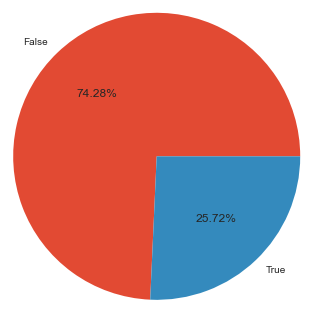

In [14]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 12
## Convert values into percentages
labels = df["Arrest"].value_counts().keys().tolist()

sizes = df["Arrest"].value_counts()

plt.pie(sizes,labels = labels,
autopct = '%1.2f%%', radius = 1.2)

plt.show()

### Geographical Data Visualization

In [1]:
chicago_map = folium.Map(location=[41.864073, -87.706819],
                        zoom_start=4
)

NameError: name 'folium' is not defined

In [19]:
#df1 = df1.reset_index()
for i in range(len(df1[:200])):
    lat = df1['Latitude'][i]
    long = df1['Longitude'][i]
    
    popup_text = """ 
    Block: {}<br>
    Crime Description: {}<br>"""
    popup_text = popup_text.format(df1['Block'][i], df1['Primary Type'][i])
    folium.CircleMarker(location = [lat, long], popup = popup_text, fill = True).add_to(chicago_map)
chicago_map

### Correlation of features

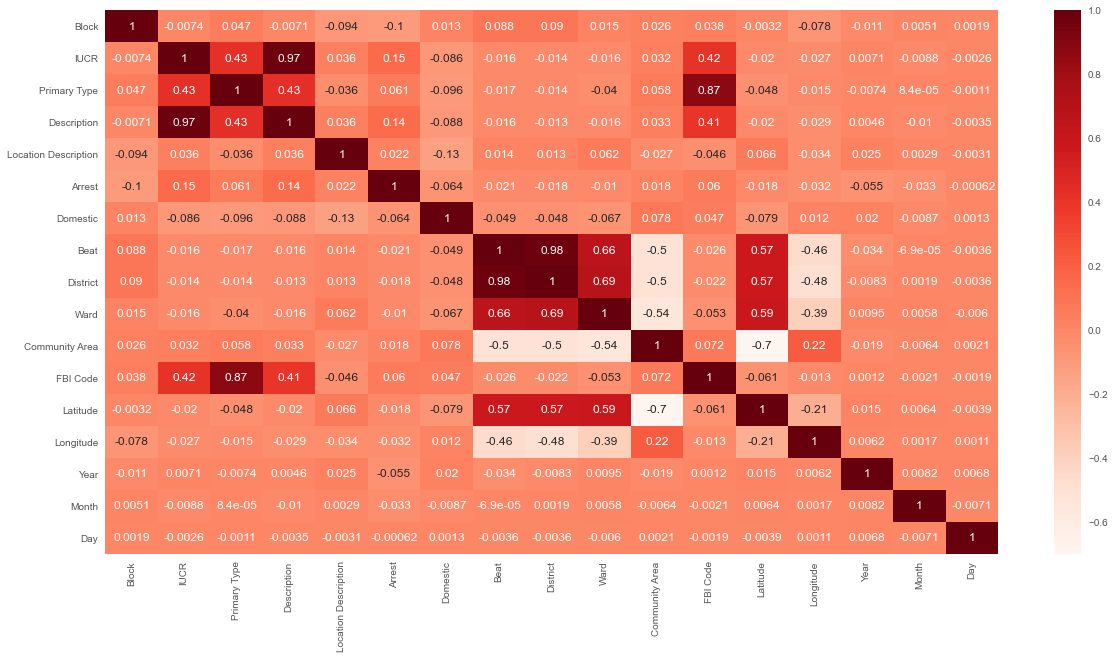

In [17]:
# Feature Selection using Filter Method 
# Split Dataframe to target class and features
X_fs = df.drop(['Primary Type'], axis=1)
Y_fs = df['Primary Type']

#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<font size = 3>Further Elaboration of Correlation:</font>

The correlation coefficient has values between -1 to 1.

    A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
    A value closer to 1 implies stronger positive correlation 
    A value closer to -1 implies stronger negative correlation  

In [18]:
#Correlation with output variable
cor_target = abs(cor['Primary Type'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

IUCR            0.429029
Primary Type    1.000000
Description     0.431718
FBI Code        0.872329
Name: Primary Type, dtype: float64